In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = 200

In [83]:
dataset = pd.read_csv("C:\\Users\\HP\\Documents\\ML\\Project\\train.csv")
test = pd.read_csv("C:\\Users\\HP\\Documents\\ML\\Project\\test.csv")
submission = pd.read_csv("C:\\Users\\HP\\Documents\\ML\\Project\\Sub.csv")

dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
idsUnique = len(set(dataset.User_ID))
idsTotal = dataset.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 544177 duplicate IDs for 550068 total entries


C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Purchase amount Distribution')

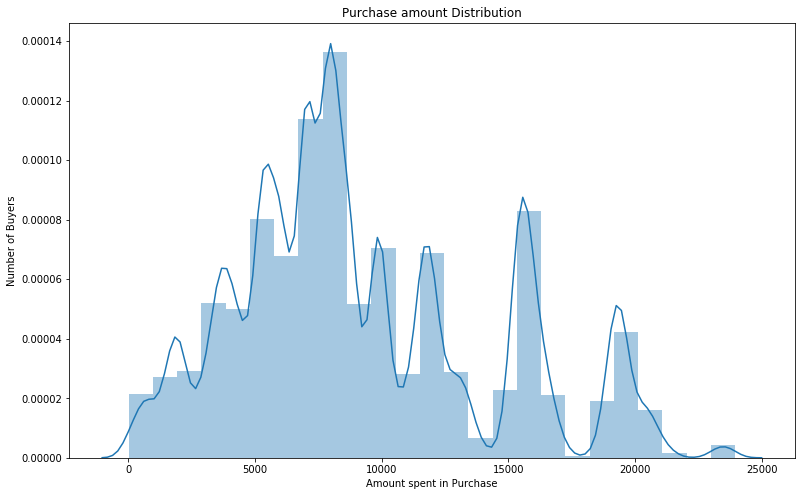

In [7]:
plt.figure(figsize=(13,8))
sns.distplot(dataset.Purchase, bins = 25)
plt.xlabel("Amount spent in Purchase")
plt.ylabel("Number of Buyers")
plt.title("Purchase amount Distribution")

In [8]:
print ("Skew is:", dataset.Purchase.skew())
print("Kurtosis: %f" % dataset.Purchase.kurt())

Skew is: 0.6001400037087128
Kurtosis: -0.338378


In [9]:
#To check which rows are numbers
numeric_features = dataset.select_dtypes(include=[np.number])
numeric_features.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

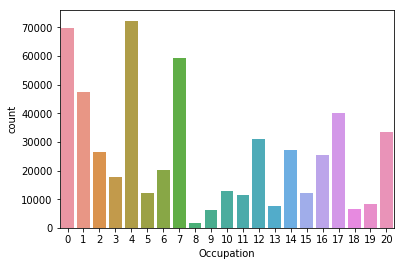

In [10]:
sns.countplot(dataset.Occupation)

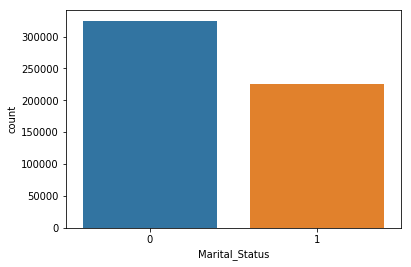

In [11]:
sns.countplot(dataset.Marital_Status)

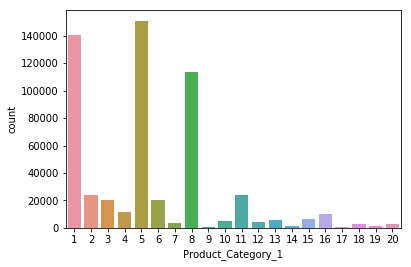

In [12]:
sns.countplot(dataset.Product_Category_1)

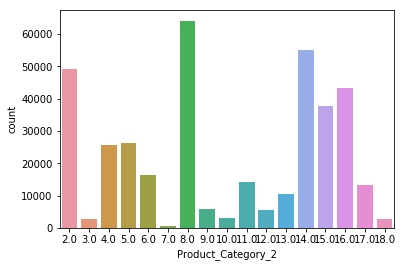

In [13]:
sns.countplot(dataset.Product_Category_2)

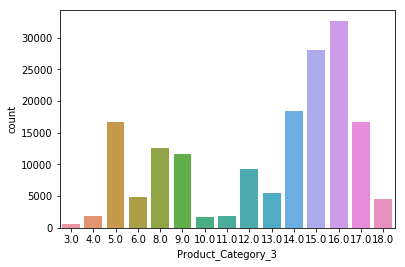

In [14]:
sns.countplot(dataset.Product_Category_3)

In [15]:
#To find the dependencies of Purchase of various attributes
corr = numeric_features.corr()

print (corr['Purchase'].sort_values(ascending=False)[:10],"\n")

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64 



# Analysis of columns with high correlation

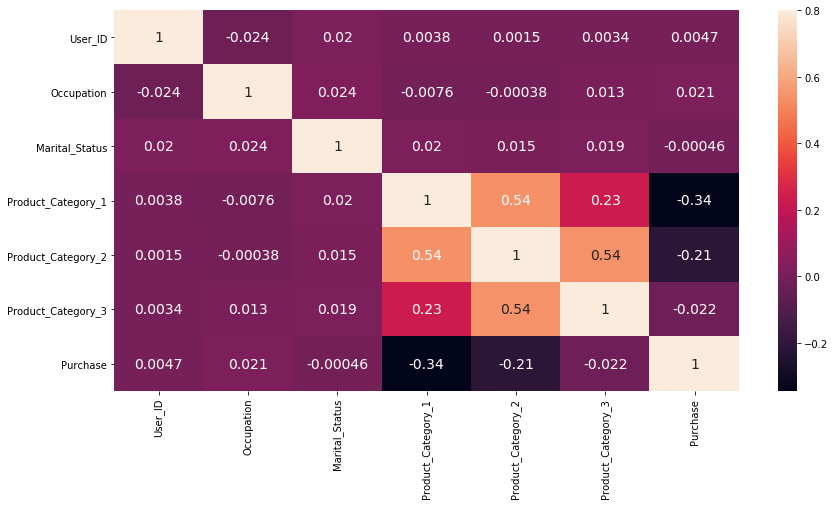

In [16]:
#correlation matrix
f, ax = plt.subplots(figsize=(14, 7))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 14}, annot=True);

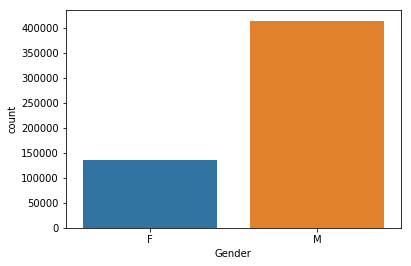

In [17]:
sns.countplot(dataset.Gender)

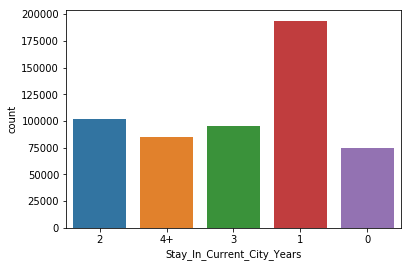

In [18]:
sns.countplot(dataset.Stay_In_Current_City_Years)

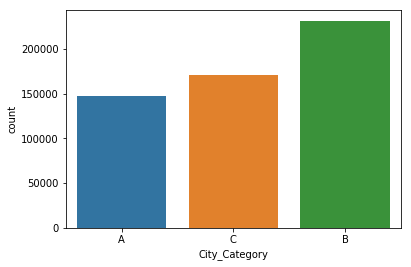

In [19]:
sns.countplot(dataset.City_Category)

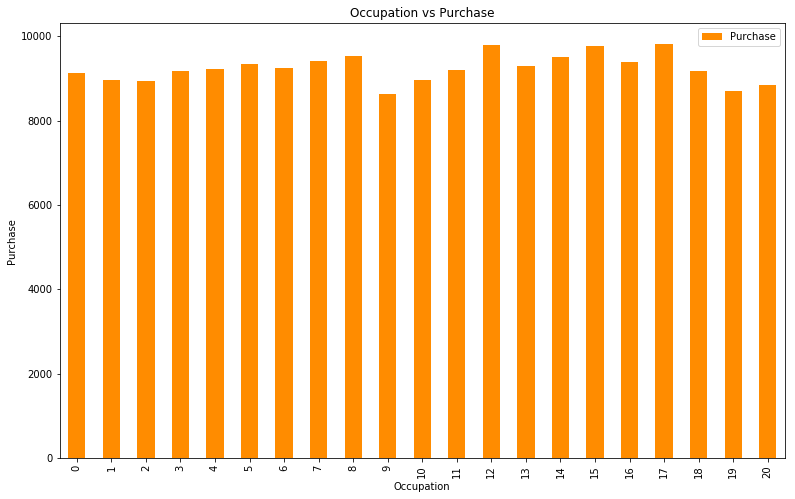

In [20]:
Occupation_pivot = \
dataset.pivot_table(index='Occupation', values="Purchase", aggfunc=np.mean)

Occupation_pivot.plot(kind='bar', color='darkorange',figsize=(13,8))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation vs Purchase")
plt.show()

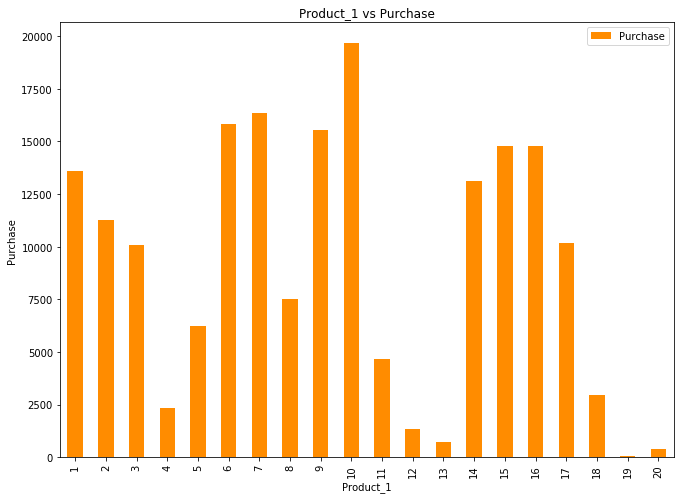

In [21]:
Product_Category_1_pivot=\
dataset.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.mean)

Product_Category_1_pivot.plot(kind='bar', color='darkorange',figsize=(11,8))
plt.xlabel("Product_1")
plt.ylabel("Purchase")
plt.title("Product_1 vs Purchase")
plt.show()

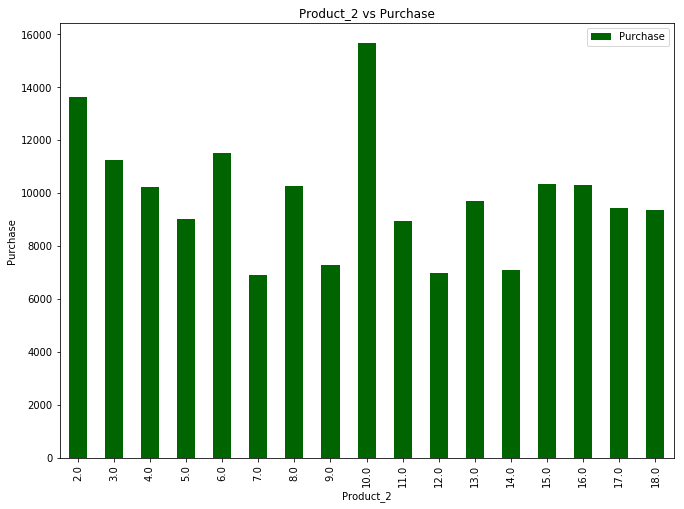

In [22]:
roduct_Category_2_pivot=\
dataset.pivot_table(index='Product_Category_2', values="Purchase")

roduct_Category_2_pivot.plot(kind='bar', color='darkgreen',figsize=(11,8))
plt.xlabel("Product_2")
plt.ylabel("Purchase")
plt.title("Product_2 vs Purchase")
plt.show()

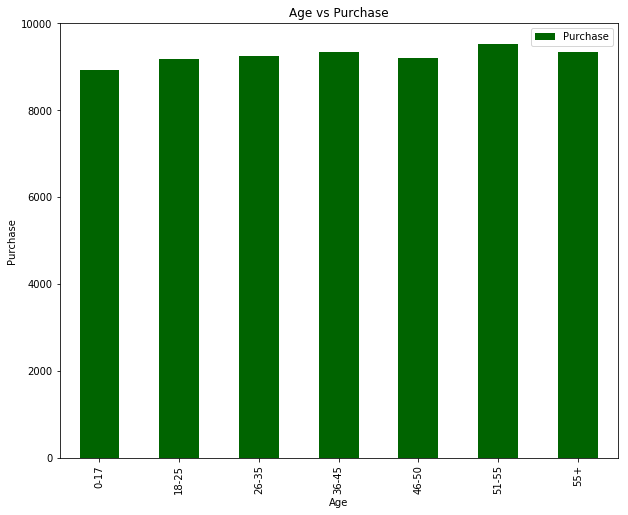

In [23]:
Age1=\
dataset.pivot_table(index='Age', values="Purchase", aggfunc=np.mean)
Age1.plot(kind='bar', color='darkgreen',figsize=(10,8))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age vs Purchase")
plt.show()

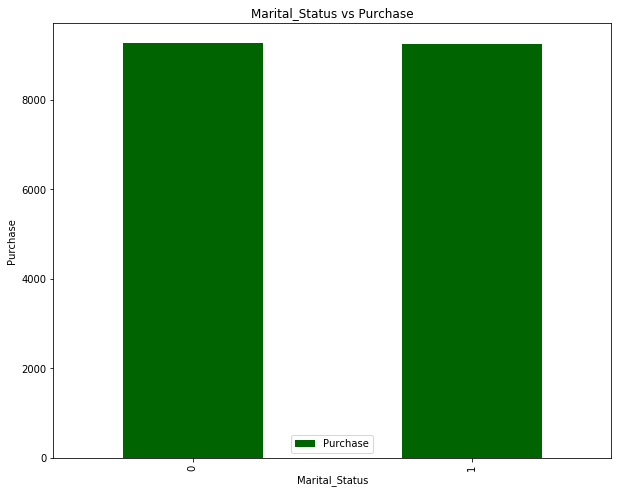

In [24]:
Occupation1 = \
dataset.pivot_table(index='Marital_Status', values="Purchase", aggfunc=np.mean)

Occupation1.plot(kind='bar', color='darkgreen',figsize=(10,8))
plt.xlabel("Marital_Status")
plt.ylabel("Purchase")
plt.title("Marital_Status vs Purchase")
plt.show()

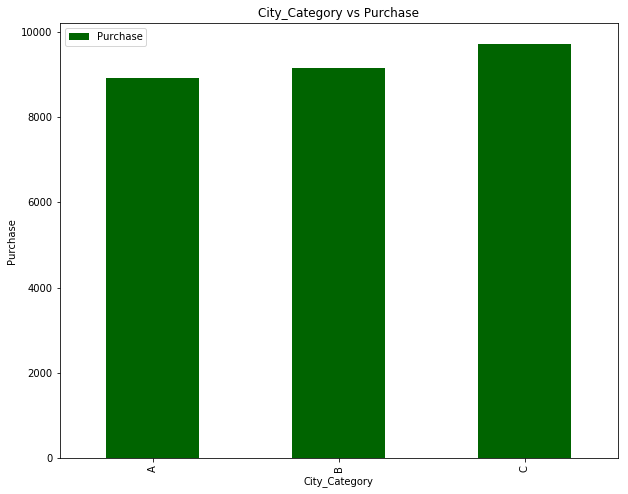

In [25]:
City1 = \
dataset.pivot_table(index='City_Category', values="Purchase", aggfunc=np.mean)

City1.plot(kind='bar', color='darkgreen',figsize=(10,8))
plt.xlabel("City_Category")
plt.ylabel("Purchase")
plt.title("City_Category vs Purchase")
plt.show()

### Data Cleaning

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [27]:
dataset['User_ID'] = dataset['User_ID'] - 1000000
test['User_ID'] = test['User_ID'] - 1000000

enc = LabelEncoder()
dataset['User_ID'] = enc.fit_transform(dataset['User_ID'])
test['User_ID'] = enc.transform(test['User_ID'])

In [28]:
dataset['Product_ID'] = dataset['Product_ID'].str.replace('P00', '')
test['Product_ID'] = test['Product_ID'].str.replace('P00', '')

scaler = StandardScaler()
dataset['Product_ID'] = scaler.fit_transform(dataset['Product_ID'].values.reshape(-1, 1))
test['Product_ID'] = scaler.transform(test['Product_ID'].values.reshape(-1, 1))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [29]:
#Concatenating sets of train and test
dataset['source']='train'
test['source']='test'

data = pd.concat([dataset,test], ignore_index = True, sort = False)

print(dataset.shape, test.shape, data.shape)

(550068, 13) (233599, 12) (783667, 13)


In [30]:
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.388587
Product_Category_3            69.648078
Purchase                      29.808452
source                         0.000000
dtype: float64

In [31]:
data["Product_Category_2"]=\
data["Product_Category_2"].fillna(-1.0).astype("float")
data.Product_Category_2.value_counts().sort_index()

-1.0     245982
 2.0      70498
 3.0       4123
 4.0      36705
 5.0      37165
 6.0      23575
 7.0        854
 8.0      91317
 9.0       8177
 10.0      4420
 11.0     20230
 12.0      7801
 13.0     15054
 14.0     78834
 15.0     54114
 16.0     61687
 17.0     19104
 18.0      4027
Name: Product_Category_2, dtype: int64

In [32]:
data["Product_Category_3"]=\
data["Product_Category_3"].fillna(-1.0).astype("float")

In [33]:
data.Product_Category_3.value_counts().sort_index()

-1.0     545809
 3.0        878
 4.0       2691
 5.0      23799
 6.0       6888
 8.0      17861
 9.0      16532
 10.0      2501
 11.0      2585
 12.0     13115
 13.0      7849
 14.0     26283
 15.0     39968
 16.0     46469
 17.0     23818
 18.0      6621
Name: Product_Category_3, dtype: int64

In [34]:
extra = data.index[(data.Product_Category_1.isin([19,20])) & (data.source == "dataset")]
data = data.drop(extra)

In [35]:
#Apply function len(unique()) to every data variable
data.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3677
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18106
source                            2
dtype: int64

In [36]:
category_cols = data.select_dtypes(include=['object']).columns.drop(["source"])
#Print frequency of categories
for col in category_cols:
 #Number of times each value appears in the column
 frequency = data[col].value_counts()
 print("\nThis is the frequency distribution for " + col + ":")
 print(frequency)


This is the frequency distribution for Gender:
M    590031
F    193636
Name: Gender, dtype: int64

This is the frequency distribution for Age:
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

This is the frequency distribution for City_Category:
B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

This is the frequency distribution for Stay_In_Current_City_Years:
1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64


In [37]:
data['Gender'],ages = pd.factorize(data['Gender'])
print(ages)
print(data['Gender'].unique())
data["Gender"].value_counts()

Index(['F', 'M'], dtype='object')
[0 1]


1    590031
0    193636
Name: Gender, dtype: int64

In [38]:
data['Age'],ages = pd.factorize(data['Age'])
print(ages)
print(data['Age'].unique())
data["Age"].value_counts()

Index(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'], dtype='object')
[0 1 2 3 4 5 6]


2    313015
5    156724
6    141953
3     65278
4     54784
1     30579
0     21334
Name: Age, dtype: int64

In [39]:
data['Stay_In_Current_City_Years'],scc = pd.factorize(data['Stay_In_Current_City_Years'])
print(scc)
print(data['Stay_In_Current_City_Years'].unique())
data['Stay_In_Current_City_Years'].value_counts()

Index(['2', '4+', '3', '1', '0'], dtype='object')
[0 1 2 3 4]


3    276425
0    145427
2    135428
1    120671
4    105716
Name: Stay_In_Current_City_Years, dtype: int64

In [40]:
data['City_Category'],cc = pd.factorize(data['City_Category'])
print(cc)
print(data['City_Category'].unique())
data['City_Category'].value_counts()

Index(['A', 'C', 'B'], dtype='object')
[0 1 2]


2    329739
1    243684
0    210244
Name: City_Category, dtype: int64

In [41]:
cat_col = ['Gender', 'City_Category']
num_col = ['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Product_Category_1', 
           'Product_Category_2', 'Product_Category_3']

In [42]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,0,-1.028774,0,0,10,0,0,0,3,-1.0,-1.0,8370.0,train
1,0,0.722139,0,0,10,0,0,0,1,6.0,14.0,15200.0,train
2,0,-0.845799,0,0,10,0,0,0,12,-1.0,-1.0,1422.0,train
3,0,-0.869157,0,0,10,0,0,0,12,14.0,-1.0,1057.0,train
4,1,1.077382,1,1,16,1,1,0,8,-1.0,-1.0,7969.0,train
5,2,0.182947,1,2,15,0,2,0,1,2.0,-1.0,15227.0,train
6,3,0.099246,1,3,7,2,0,1,1,8.0,17.0,19215.0,train
7,3,1.668157,1,3,7,2,0,1,1,15.0,-1.0,15854.0,train
8,3,-0.754312,1,3,7,2,0,1,1,16.0,-1.0,15686.0,train
9,4,0.975189,1,2,20,0,3,1,8,-1.0,-1.0,7871.0,train


In [43]:
encoder = LabelEncoder()
data1=data.copy()

In [44]:
for col in cat_col:
    data1[col] = encoder.fit_transform(data1[col])

In [45]:
scaler = StandardScaler()

for col in num_col:
    data1[col] = scaler.fit(data1[col].values.reshape(-1, 1))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [46]:
data1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,0,-1.028774,0,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",0,"StandardScaler(copy=True, with_mean=True, with...",0,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",8370.0,train
1,0,0.722139,0,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",0,"StandardScaler(copy=True, with_mean=True, with...",0,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",15200.0,train
2,0,-0.845799,0,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",0,"StandardScaler(copy=True, with_mean=True, with...",0,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",1422.0,train
3,0,-0.869157,0,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",0,"StandardScaler(copy=True, with_mean=True, with...",0,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",1057.0,train
4,1,1.077382,1,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",1,"StandardScaler(copy=True, with_mean=True, with...",0,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",7969.0,train
5,2,0.182947,1,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",0,"StandardScaler(copy=True, with_mean=True, with...",0,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",15227.0,train
6,3,0.099246,1,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",2,"StandardScaler(copy=True, with_mean=True, with...",1,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",19215.0,train
7,3,1.668157,1,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",2,"StandardScaler(copy=True, with_mean=True, with...",1,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",15854.0,train
8,3,-0.754312,1,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",2,"StandardScaler(copy=True, with_mean=True, with...",1,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",15686.0,train
9,4,0.975189,1,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",0,"StandardScaler(copy=True, with_mean=True, with...",1,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",7871.0,train


### Count Functions

In [47]:
def getCountVar(compute_df, count_df, var_name):
    grouped_df = count_df.groupby(var_name)
    count_dict = {}
    for name, group in grouped_df:
        count_dict[name] = group.shape[0]
    count_list = []
    for index, row in compute_df.iterrows():
        name = row[var_name]
        count_list.append(count_dict.get(name, 0))
    return count_list

In [48]:
# data["Age_Count"] =getCountVar(data, data, "Age")

In [49]:
# data["Occupation_Count"] =getCountVar(data, data, "Occupation")

In [50]:
# data["Product_Category_1_Count"] =getCountVar(data, data,"Product_Category_1")
# data["Product_Category_2_Count"] =getCountVar(data, data,"Product_Category_2")
# data["Product_Category_3_Count"] =getCountVar(data, data,"Product_Category_3")

In [51]:
# data["Product_ID_Count"] =getCountVar(data, data, "Product_ID")

In [52]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [53]:
# #Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("C:\\Users\\HP\\Documents\\ML\\Project\\train_modified.csv",index=False)
test.to_csv("C:\\Users\\HP\\Documents\\ML\\Project\\test_modified.csv",index=False)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [54]:
product_id_res = data.groupby(["Product_ID"])["Purchase"].mean()
avg_cost = data["Purchase"].mean()
# If i find a product id for which i dont have an avg pricing i will use global vg pricing.
product_id_res_map = {}
# created a map with product id to avg price map
val = product_id_res.iteritems()
for key, value in val:
    p_id = str(key)
    product_id_res_map[p_id] = value

In [55]:
def get_purchase_mean(product_id, product_category=None, key=None):
    key_pair = str(product_id)
    key_pair_pid = str(product_id) + str(product_category)
    if key == "1":
        if key_pair_pid in product_category_1_res:
            return product_category_1_res[key_pair_pid]
    elif key == "2":
        if key_pair_pid in product_category_2_res:
            return product_category_2_res[key_pair_pid]
    elif key == "3":
        if key_pair_pid in product_category_3_res:
            return product_category_3_res[key_pair_pid]
    if key_pair in product_id:
         return product_id[key_pair]
    return avg_cost

In [56]:
get_purchase_mean(data.Product_ID)

9263.968712959126

### Finding models to predict purchase

In [57]:
train_df = pd.read_csv("C:\\Users\\HP\\Documents\\ML\\Project\\train_modified.csv")
test_df = pd.read_csv("C:\\Users\\HP\\Documents\\ML\\Project\\test_modified.csv")

In [58]:
# #Define target and ID columns:
# target = 'Item_Outlet_Sales'
# IDcol = ['Item_Identifier','Outlet_Identifier']

#Define target and ID columns:
target = 'Purchase'
IDcol = ['User_ID','Product_ID']

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [59]:
def commonfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fitting the algorithm
    alg.fit(dtrain[predictors], dtrain[target])
        
    dtrain_predictions = alg.predict(dtrain[predictors])

    cv_score = cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    print("\nModel Report")
    #The value to check is RMSE(parameter)
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    dtest[target] = alg.predict(dtest[predictors])
    
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)


Model Report
RMSE : 4632
CV Score : Mean - 4635 | Std - 35.02 | Min - 4545 | Max - 4688


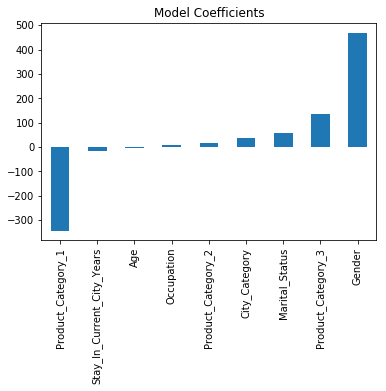

In [60]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)

predictors = train_df.columns.drop(['Purchase','Product_ID','User_ID'])
commonfit(LR, train_df, test_df, predictors, target, IDcol, 'LR1.csv')

coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [61]:
from sklearn.linear_model import Ridge
RR1 = Ridge(alpha=0.05,normalize=True)
commonfit(RR1, train_df, test_df, predictors, target, IDcol, 'RR.csv')


Model Report
RMSE : 4633
CV Score : Mean - 4636 | Std - 31.86 | Min - 4570 | Max - 4687


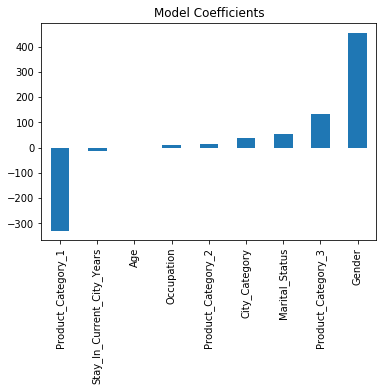

In [62]:
coef1 = pd.Series(RR1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [63]:
from sklearn.linear_model import Ridge
RR1 = Ridge(alpha=3,normalize=True)
commonfit(RR1, train_df, test_df, predictors, target, IDcol, 'RR1.csv')


Model Report
RMSE : 4817
CV Score : Mean - 4818 | Std - 112.1 | Min - 4741 | Max - 5293


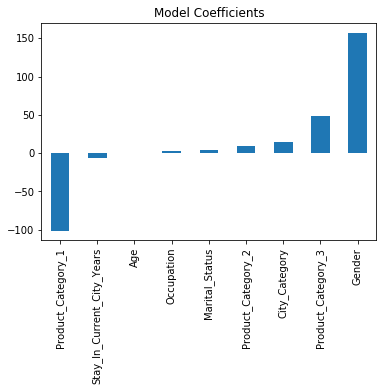

In [64]:
coef1 = pd.Series(RR1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [65]:
from sklearn.linear_model import Ridge
RR3 = Ridge(alpha=5,normalize=True)
commonfit(RR3, train_df, test_df, predictors, target, IDcol, 'RR3.csv')


Model Report
RMSE : 4874
CV Score : Mean - 4873 | Std - 132.8 | Min - 4791 | Max - 5441


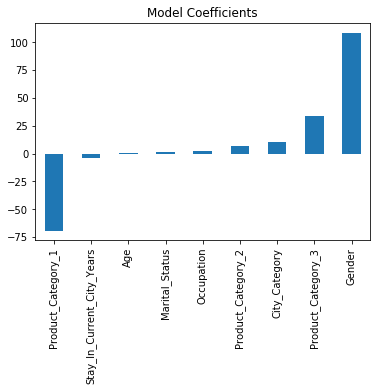

In [66]:
coef1 = pd.Series(RR3.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [67]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=200)
commonfit(DT, train_df, test_df, predictors, target, IDcol, 'DT.csv')
importances = DT.feature_importances_


Model Report
RMSE : 2916
CV Score : Mean - 2947 | Std - 19.9 | Min - 2907 | Max - 2977


In [68]:
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(train_df[predictors].shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 6 (0.960362)
2. feature 7 (0.015366)
3. feature 8 (0.010731)
4. feature 3 (0.004482)
5. feature 2 (0.003268)
6. feature 1 (0.002386)
7. feature 4 (0.001721)
8. feature 0 (0.000868)
9. feature 5 (0.000815)


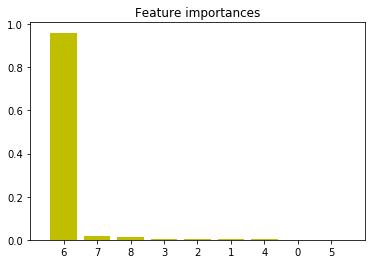

In [69]:
X=train_df[predictors]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="y", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [70]:
RF = DecisionTreeRegressor(max_depth=9, min_samples_leaf=100)
commonfit(RF, train_df, test_df, predictors, target, IDcol,'RF.csv')


Model Report
RMSE : 2956
CV Score : Mean - 2973 | Std - 20.58 | Min - 2936 | Max - 3008


In [71]:
importances = RF.feature_importances_

In [74]:
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(train_df[predictors].shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 6 (0.973933)
2. feature 7 (0.011412)
3. feature 8 (0.008712)
4. feature 3 (0.003923)
5. feature 2 (0.000629)
6. feature 1 (0.000587)
7. feature 0 (0.000399)
8. feature 4 (0.000247)
9. feature 5 (0.000158)


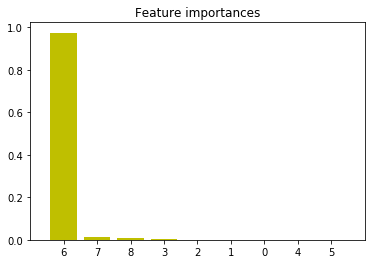

In [75]:
X=train_df[predictors]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="y", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### XBoost 

In [76]:
import sys
!{sys.executable} -m pip install xgboost

In [77]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_df[predictors], train_df[target], early_stopping_rounds=5, eval_set=[(test_df[predictors], test_df[target])], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [78]:
train_df_predictions = my_model.predict(train_df[predictors])

predictions = my_model.predict(test_df[predictors])

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions)))

IDcol.append(target)
submission = pd.DataFrame({ x: test_df[x] for x in IDcol})
submission.to_csv("XGBoost.csv", index=False)

Mean Absolute Error : 291.07910132748555
RMSE : 2964


In [79]:
importances = my_model.feature_importances_

In [80]:
indices = np.argsort(importances)[::-1]
print("Feature order:")
for f in range(train_df[predictors].shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature order:
1. feature 6 (0.458802)
2. feature 7 (0.158937)
3. feature 8 (0.119766)
4. feature 2 (0.080594)
5. feature 1 (0.061684)
6. feature 3 (0.053579)
7. feature 4 (0.030167)
8. feature 0 (0.027015)
9. feature 5 (0.009455)


In [81]:
# xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

# xgb_reg.fit(train, y_train)
# y_pred = xgb_reg.predict(X_val)
# rmse = np.sqrt(mean_squared_error(y_pred, y_val))

# print xgb_reg, rmse

# xgb_reg.fit(X, y)
# predict = xgb_reg.predict(X_test)

# submission['Purchase'] = predict
# submission.to_csv('Sample_Submission_Tm9Lura.csv', index=False)

### More evenly distributed model

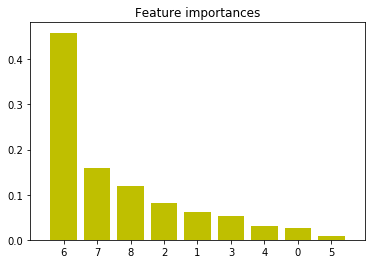

In [82]:
X=train_df[predictors]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="y", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Hyperparameter Tuning

### Exhaustive- Random Forest

In [83]:
from sklearn.ensemble import RandomForestRegressor

RF11=RandomForestRegressor(n_estimators=10, max_depth=3)
RF21=RandomForestRegressor(n_estimators=10, max_depth=10)
RF31=RandomForestRegressor(n_estimators=10, max_depth=20)
RF41=RandomForestRegressor(n_estimators=10, max_depth=40)

In [84]:
RF5=RandomForestRegressor(n_estimators=50, max_depth=3)
# RF6=RandomForestClassifier(n_estimators=50, max_depth=10)
# RF7=RandomForestClassifier(n_estimators=50, max_depth=20)
# RF8=RandomForestClassifier(n_estimators=50, max_depth=40)

In [85]:
RF9=RandomForestRegressor(n_estimators=100, max_depth=3)
# RF10=RandomForestClassifier(n_estimators=100, max_depth=10)
# RF11=RandomForestClassifier(n_estimators=100, max_depth=20)
# RF12=RandomForestClassifier(n_estimators=100, max_depth=40)

In [86]:
RF13=RandomForestRegressor(n_estimators=200, max_depth=3)
# RF14=RandomForestClassifier(n_estimators=200, max_depth=10)
# RF15=RandomForestClassifier(n_estimators=200, max_depth=20)
# RF16=RandomForestClassifier(n_estimators=200, max_depth=40)

In [87]:
RF11

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [ ]:
commonfit(RF11, train_df, test_df, predictors, target, IDcol, 'RF11.csv')

In [ ]:
RF21.fit(train_df[predictors], train_df[target])
train_df_predictions = RF21.predict(train_df[predictors])
predictions = RF21.predict(test_df[predictors])

In [ ]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions)))

In [ ]:
RF31.fit(train_df[predictors], train_df[target])
train_df_predictions = RF31.predict(train_df[predictors])
predictions = RF31.predict(test_df[predictors])
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions)))

In [ ]:
importances = RF31.feature_importances_

In [ ]:
indices = np.argsort(importances)[::-1]
print("Feature order:")
for f in range(train_df[predictors].shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

In [ ]:
X=train_df[predictors]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="y", align="center")
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
RF41.fit(train_df[predictors], train_df[target])
train_df_predictions1 = RF41.predict(train_df[predictors])
predictions = RF41.predict(test_df[predictors])
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions1)))

In [ ]:
importances = RF41.feature_importances_

In [ ]:
indices = np.argsort(importances)[::-1]
print("Feature order:")
for f in range(train_df[predictors].shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

In [ ]:
X=train_df[predictors]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="y", align="center")
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
RF5.fit(train_df[predictors], train_df[target])
train_df_predictions = RF5.predict(train_df[predictors])
predictions = RF5.predict(test_df[predictors])
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions)))

In [ ]:
RF9.fit(train_df[predictors], train_df[target])
train_df_predictions = RF9.predict(train_df[predictors])
predictions = RF9.predict(test_df[predictors])
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions)))

### Extreme Tree

In [ ]:
# from sklearn.ensemble import ExtraTreesRegressor
# ET = ExtraTreesRegressor(n_estimators=1450, max_depth=8,min_samples_split=10, min_samples_leaf=10, oob_score=True, n_jobs=6, random_state=123, verbose=1, bootstrap=True)
# ET.fit(train_df[predictors], train_df[target])

In [ ]:
train_df_predictions = ET.predict(train_df[predictors])
predictions = ET.predict(test_df[predictors])

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions)))

In [ ]:
train_df_predictions = ET.predict(train_df[predictors])

In [ ]:
from scipy.stats import expon as exp
from scipy.stats import randint as ri

In [ ]:
n_estimators = exp(scale=100)
max_depth = ri(1, 40)
from sklearn.ensemble import RandomForestRegressor
RF1=RandomForestRegressor(n_estimators=20, max_depth=4)

In [ ]:
RF1

In [ ]:
RF1.fit(train_df[predictors], train_df[target])

In [ ]:
train_df_predictions = RF1.predict(train_df[predictors])
predictions = RF1.predict(test_df[predictors])

In [ ]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions)))

### Rule Based Learning

In [ ]:
import sys
!{sys.executable} -m pip install skope-rules

In [ ]:
# from sklearn.metrics import precision_recall_curve
# from matplotlib import pyplot as plt
# from skrules import SkopeRules

# clf = SkopeRules(max_depth_duplication=None,
#                  n_estimators=30,
#                  precision_min=0.2,
#                  recall_min=0.01,
#                  feature_names=.feature_names)

# X, y = train_df[predictors], train_df[target] > 25
# X_train, y_train = X[:len(y)//2], y[:len(y)//2]
# X_test, y_test = X[len(y)//2:], y[len(y)//2:]
# clf.fit(X_train, y_train)
# y_score = clf.score_top_rules(X_test) # Get a risk score for each test example
# precision, recall, _ = precision_recall_curve(y_test, y_score)
# plt.plot(recall, precision)
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision Recall curve')
# plt.show()

### Association Rule Mining

In [69]:
import sys
!{sys.executable} -m pip install mlxtend

In [105]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [110]:
basket = train_df[(train_df['Product_Category_1'] == 4)]

In [111]:
basket

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
15,5,0.150829,0,4,9,0,3,0,4,5.0,-1.0,2079.0
72,17,-0.222906,0,6,3,2,2,0,4,8.0,9.0,2802.0
80,17,-0.784483,0,6,3,2,2,0,4,5.0,-1.0,697.0
175,32,0.433078,1,3,3,0,3,1,4,5.0,-1.0,811.0
176,32,-1.142646,1,3,3,0,3,1,4,5.0,-1.0,2846.0
196,35,-0.701755,1,2,3,2,4,0,4,8.0,9.0,2832.0
230,39,-1.399589,1,2,8,1,4,1,4,5.0,9.0,2826.0
242,41,1.382016,1,3,17,2,2,1,4,5.0,-1.0,3524.0
264,45,-1.159192,1,2,4,2,2,1,4,5.0,-1.0,1447.0
286,45,-0.784483,1,2,4,2,2,1,4,5.0,-1.0,1446.0


In [108]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

newtrain = train_df.applymap(encode_units)

In [109]:
newtrain

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0.0,0,0,1,0,0,0,1,0,0,1
1,0,NaN,0,0,1,0,0,0,1,1,1,1
2,0,0.0,0,0,1,0,0,0,1,0,0,1
3,0,0.0,0,0,1,0,0,0,1,1,0,1
4,1,1.0,1,1,1,1,1,0,1,0,0,1
5,1,NaN,1,1,1,0,1,0,1,1,0,1
6,1,NaN,1,1,1,1,0,1,1,1,1,1
7,1,1.0,1,1,1,1,0,1,1,1,0,1
8,1,0.0,1,1,1,1,0,1,1,1,0,1
9,1,NaN,1,1,1,0,1,1,1,0,0,1


In [112]:
newtrain=newtrain.dropna()

In [113]:
predictors1 = train_df.columns.drop(['Product_ID','User_ID','Marital_Status','Stay_In_Current_City_Years'])

In [114]:
frequent_itemsets = apriori(newtrain[predictors1], min_support=0.07, use_colnames=True)

In [115]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [116]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gender),(Age),0.750480,0.972958,0.732390,0.975896,1.003020,0.002205,1.121888
1,(Age),(Gender),0.972958,0.750480,0.732390,0.752746,1.003020,0.002205,1.009165
2,(Gender),(Occupation),0.750480,0.873749,0.657868,0.876596,1.003259,0.002137,1.023072
3,(Occupation),(Gender),0.873749,0.750480,0.657868,0.752925,1.003259,0.002137,1.009898
4,(Gender),(Product_Category_1),0.750480,1.000000,0.750480,1.000000,1.000000,0.000000,inf
5,(Product_Category_1),(Gender),1.000000,0.750480,0.750480,0.750480,1.000000,0.000000,1.000000
6,(Gender),(Product_Category_2),0.750480,0.690115,0.521091,0.694344,1.006128,0.003174,1.013835
7,(Product_Category_2),(Gender),0.690115,0.750480,0.521091,0.755078,1.006128,0.003174,1.018776
8,(Gender),(Product_Category_3),0.750480,0.316267,0.244361,0.325607,1.029531,0.007009,1.013849
9,(Product_Category_3),(Gender),0.316267,0.750480,0.244361,0.772642,1.029531,0.007009,1.097479


In [117]:
rules[ (rules['lift'] > 1.0) &
       (rules['confidence'] > 0.73)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gender),(Age),0.750480,0.972958,0.732390,0.975896,1.003020,0.002205,1.121888
1,(Age),(Gender),0.972958,0.750480,0.732390,0.752746,1.003020,0.002205,1.009165
2,(Gender),(Occupation),0.750480,0.873749,0.657868,0.876596,1.003259,0.002137,1.023072
3,(Occupation),(Gender),0.873749,0.750480,0.657868,0.752925,1.003259,0.002137,1.009898
7,(Product_Category_2),(Gender),0.690115,0.750480,0.521091,0.755078,1.006128,0.003174,1.018776
9,(Product_Category_3),(Gender),0.316267,0.750480,0.244361,0.772642,1.029531,0.007009,1.097479
12,(Age),(Occupation),0.972958,0.873749,0.850584,0.874225,1.000544,0.000462,1.003779
13,(Occupation),(Age),0.873749,0.972958,0.850584,0.973487,1.000544,0.000462,1.019963
18,(City_Category),(Occupation),0.732435,0.873749,0.640659,0.874696,1.001084,0.000694,1.007558
19,(Occupation),(City_Category),0.873749,0.732435,0.640659,0.733229,1.001084,0.000694,1.002976


In [118]:
newtrain1 = basket.applymap(encode_units)

In [119]:
newtrain1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
15,1,NaN,0,1,1,0,1,0,1,1,0,1
72,1,0.0,0,1,1,1,1,0,1,1,1,1
80,1,0.0,0,1,1,1,1,0,1,1,0,1
175,1,NaN,1,1,1,0,1,1,1,1,0,1
176,1,0.0,1,1,1,0,1,1,1,1,0,1
196,1,0.0,1,1,1,1,1,0,1,1,1,1
230,1,0.0,1,1,1,1,1,1,1,1,1,1
242,1,1.0,1,1,1,1,1,1,1,1,0,1
264,1,0.0,1,1,1,1,1,1,1,1,0,1
286,1,0.0,1,1,1,1,1,1,1,1,0,1


In [120]:
frequent_itemsets = apriori(newtrain1[predictors1], min_support=0.07, use_colnames=True)

In [121]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [129]:
rules[ (rules['lift'] > 1.02) &
       (rules['confidence'] > 0.966)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
64,"(Gender, Product_Category_3)",(Age),0.323832,0.935506,0.312941,0.966369,1.032991,0.009994,1.917694
323,"(Gender, Product_Category_3, Occupation)",(Age),0.285459,0.935506,0.276185,0.967511,1.034212,0.009136,1.985119
405,"(Gender, Product_Category_3, Product_Category_1)",(Age),0.323832,0.935506,0.312941,0.966369,1.032991,0.009994,1.917694
408,"(Gender, Product_Category_3)","(Age, Product_Category_1)",0.323832,0.935506,0.312941,0.966369,1.032991,0.009994,1.917694
433,"(Gender, Product_Category_3, Product_Category_2)",(Age),0.323832,0.935506,0.312941,0.966369,1.032991,0.009994,1.917694
436,"(Gender, Product_Category_3)","(Product_Category_2, Age)",0.323832,0.924615,0.312941,0.966369,1.045158,0.013521,2.241526
461,"(Gender, Product_Category_3, Purchase)",(Age),0.323832,0.935506,0.312941,0.966369,1.032991,0.009994,1.917694
464,"(Gender, Product_Category_3)","(Age, Purchase)",0.323832,0.935506,0.312941,0.966369,1.032991,0.009994,1.917694
1141,"(Gender, Product_Category_3, Product_Category_...",(Age),0.285459,0.935506,0.276185,0.967511,1.034212,0.009136,1.985119
1148,"(Gender, Product_Category_3, Occupation)","(Age, Product_Category_1)",0.285459,0.935506,0.276185,0.967511,1.034212,0.009136,1.985119


In [132]:
from sklearn import tree
import collections

In [74]:
import sys
!{sys.executable} -m pip install graphviz

In [75]:
import pydotplus

In [133]:
X=train_df[predictors].loc[:2000,]
y=train_df[target].loc[:2000,]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X,y)

In [87]:
clf

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [88]:
# from sklearn.tree import export_graphviz
# import graphviz
# graphviz.Source(export_graphviz(clf, out_file = None, feature_names = X.columns.tolist()))

In [89]:
import sys
!{sys.executable} -m  pip install git+git://github.com/christophM/rulefit.git

  Cloning git://github.com/christophM/rulefit.git to c:\users\hp\appdata\local\temp\pip-req-build-o1caisc0
  Using cached https://files.pythonhosted.org/packages/61/c7/f943fceb712579bc538700e2c157dc4972e16abfe29bd4969149bad98c74/pandas-0.24.2-cp37-cp37m-win_amd64.whl
  Running setup.py bdist_wheel for RuleFit: started
  Running setup.py bdist_wheel for RuleFit: finished with status 'done'
  Stored in directory: C:\Users\HP\AppData\Local\Temp\pip-ephem-wheel-cache-muxdx6de\wheels\0b\51\b8\9dc135361d610b383e5029f82ceb5b73eef717e0c1212c8cd1
Successfully built RuleFit
  Found existing installation: pandas 0.23.4
    Uninstalling pandas-0.23.4:
      Successfully uninstalled pandas-0.23.4


Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\HP\\AppData\\Local\\Temp\\pip-uninstall-y01sn1gu\\users\\hp\\anaconda3\\lib\\site-packages\\pandas\\io\\msgpack\\_packer.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [90]:
import sys
!{sys.executable} -m  pip install graphviz

In [91]:
# import rulefit
# from rulefit import RuleFit


# y = train_df[target]
# X = train_df[predictors]
# features = X.columns
# X = X.as_matrix()

# rf = RuleFit()
# rf.fit(X, y, feature_names=features)

In [92]:
pd.DataFrame(clf.decision_path(X).toarray()).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
pd.concat([X.reset_index(drop=True),pd.DataFrame(clf.decision_path(X).toarray())],1).head(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,...,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794
0,0,0,10,0,0,0,3,-1.0,-1.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,10,0,0,0,1,6.0,14.0,1,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,10,0,0,0,12,-1.0,-1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,10,0,0,0,12,14.0,-1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,16,1,1,0,8,-1.0,-1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [112]:
dTree3 = DecisionTreeRegressor(max_depth = 4)
commonfit(dTree3, train_df, test_df, predictors, target, IDcol, 'DT.csv')

Xrules = pd.concat([X.reset_index(drop=True),pd.DataFrame(dTree3.decision_path(X).toarray()).iloc[:,1:]],1)


from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(Xrules, y)


Model Report
RMSE : 3634
CV Score : Mean - 3642 | Std - 29.4 | Min - 3560 | Max - 3686


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [94]:
def find_node(tree_, current_node, search_node, features):
    
    child_left = tree_.children_left[current_node]
    child_right = tree_.children_right[current_node]

    split_feature = str(features[tree_.feature[current_node]])
    split_value = str(tree_.threshold[current_node])


    if child_left != -1:
        if child_left != search_node:
            left_one = find_node(tree_, child_left, search_node, features)
        else:
            return(str(split_feature)+" <= "+str(split_value))
    else:
        return ""

    if child_right != -1:
        if child_right != search_node:
            right_one = find_node(tree_, child_right, search_node, features)
        else:
            return(str(split_feature)+" > "+str(split_value))
    else:
        return ""


    if len(left_one)>0:
        return(str(split_feature)+" <= "+str(split_value)+", "+left_one)
    elif len(right_one)>0:
        return(str(split_feature)+" > "+str(split_value)+","+right_one)
    else:
        return ""

In [82]:
dataset1

0         False
1          True
2         False
3         False
4         False
5          True
6          True
7          True
8          True
9         False
10        False
11        False
12        False
13         True
14        False
15        False
16         True
17        False
18         True
19         True
20        False
21        False
22        False
23        False
24         True
25         True
26        False
27        False
28        False
29         True
          ...  
550038    False
550039    False
550040    False
550041    False
550042    False
550043    False
550044    False
550045    False
550046    False
550047    False
550048    False
550049    False
550050    False
550051    False
550052    False
550053    False
550054    False
550055    False
550056    False
550057    False
550058    False
550059    False
550060    False
550061    False
550062    False
550063    False
550064    False
550065    False
550066    False
550067    False
Name: Purchase, Length: 

In [95]:
find_node(tree_ = clf.tree_, current_node = 0, search_node = 13, features = X.columns.tolist())

'Product_Category_1 <= 3.5, Occupation <= 13.5, Product_Category_1 <= 2.5, Product_Category_2 > 0.5,Gender <= 0.5, Product_Category_3 <= 16.5, Stay_In_Current_City_Years <= 2.5, Stay_In_Current_City_Years <= 1.5, Product_Category_3 <= 15.5, Product_Category_3 <= 6.5'

In [135]:
dataset[(dataset['Purchase'] >= 10000)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055
18,1000007,P00036842,M,36-45,1,B,1,1,1,14.0,16.0,11788
19,1000008,P00249542,M,26-35,12,C,4+,1,1,5.0,15.0,19614
24,1000008,P00303442,M,26-35,12,C,4+,1,1,8.0,14.0,11927


In [115]:
dfDecisionPath = pd.DataFrame(clf.decision_path(X).toarray())

In [116]:
dfDecisionPath.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dTree3 = DecisionTreeRegressor(max_depth = 4)
commonfit(dTree3, train_df, test_df, predictors, target, IDcol, 'DT.csv')

Xrules = pd.concat([X.reset_index(drop=True),pd.DataFrame(dTree3.decision_path(X).toarray()).iloc[:,1:]],1)


from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(Xrules, y)

In [117]:
predictors3=['Product_Category_1','Product_Category_2','Product_Category_3']
store_data=train_df[predictors3]

In [118]:
store_data= store_data.applymap(encode_units)
store_data=store_data.dropna()

In [119]:
store_data

,Product_Category_1,Product_Category_2,Product_Category_3
0,1,0,0
1,1,1,1
2,1,0,0
3,1,1,0
4,1,0,0
5,1,1,0
6,1,1,1
7,1,1,0
8,1,1,0
9,1,0,0


In [120]:
frequent_itemsets = apriori(store_data, min_support=0.07, use_colnames=True)

In [121]:
frequent_itemsets

,support,itemsets
0,1.000000,(Product_Category_1)
1,0.684334,(Product_Category_2)
2,0.303273,(Product_Category_3)
3,0.684334,"(Product_Category_1, Product_Category_2)"
4,0.303273,"(Product_Category_1, Product_Category_3)"
5,0.303273,"(Product_Category_3, Product_Category_2)"
6,0.303273,"(Product_Category_1, Product_Category_3, Produ..."


In [102]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,0,-1.028774,0,0,10,0,0,0,3,-1.0,-1.0,8370.0,train
1,0,0.722139,0,0,10,0,0,0,1,6.0,14.0,15200.0,train
2,0,-0.845799,0,0,10,0,0,0,12,-1.0,-1.0,1422.0,train
3,0,-0.869157,0,0,10,0,0,0,12,14.0,-1.0,1057.0,train
4,1,1.077382,1,1,16,1,1,0,8,-1.0,-1.0,7969.0,train
5,2,0.182947,1,2,15,0,2,0,1,2.0,-1.0,15227.0,train
6,3,0.099246,1,3,7,2,0,1,1,8.0,17.0,19215.0,train
7,3,1.668157,1,3,7,2,0,1,1,15.0,-1.0,15854.0,train
8,3,-0.754312,1,3,7,2,0,1,1,16.0,-1.0,15686.0,train
9,4,0.975189,1,2,20,0,3,1,8,-1.0,-1.0,7871.0,train


In [134]:
dTree3 = DecisionTreeRegressor(max_depth = 6)
commonfit(dTree3, train_df, test_df, predictors, target, IDcol, 'DT.csv')

Xrules = pd.concat([X.reset_index(drop=True),pd.DataFrame(dTree3.decision_path(X).toarray()).iloc[:,1:]],1)


from sklearn.linear_model import LinearRegression

tree_model = DecisionTreeRegressor()
tree_model.fit(Xrules, y)


Model Report
RMSE : 2996
CV Score : Mean - 3242 | Std - 54.63 | Min - 3031 | Max - 3289


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')